# General prediction analysis of a single model

In [1]:
from pa_utils import *

Load data splits

In [2]:
train, dev, test = [read_data(split_file) for split_file in ["train", "dev_seen", "test_seen"]]

Target class distribution

In [3]:
train.label.value_counts(), dev.label.value_counts()

(0    5481
 1    3019
 Name: label, dtype: int64,
 0    253
 1    247
 Name: label, dtype: int64)

In [4]:
run_name = "fine-silence-85"
dev_preds = pd.read_csv(f"../model_checkpoints/{run_name}/meme_dev_seen_preds.csv")

dev_preds = pd.merge(dev_preds, dev[["id", "text"]], on="id")

Plot confusimon matrix

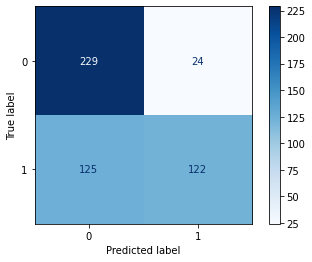

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(dev_preds["gt"], dev_preds["label"])

cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)

Zoom in on particular examples

In [6]:
fps = dev_preds[(dev_preds["gt"]==0) & (dev_preds["label"]==1)]
fns = dev_preds[(dev_preds["gt"]==1) & (dev_preds["label"]==0)]
tps = dev_preds[(dev_preds["gt"]==1) & (dev_preds["label"]==1)]
tns = dev_preds[(dev_preds["gt"]==0) & (dev_preds["label"]==0)]

In [7]:
fns.sort_values("proba")

,id,proba,label,gt,text
19,9563,0.001168,0,1,safe sex isis style
76,95830,0.001252,0,1,face of terrorism in us
257,23645,0.001279,0,1,what do they have in common? you enjoy pushing them down the stairs
174,39827,0.001290,0,1,kick them out of country
134,73069,0.001306,0,1,immigration invasion learn the difference
155,76921,0.001383,0,1,she probably asked a wrong question
267,73914,0.001410,0,1,be careful who you call ugly in highschool
60,18945,0.001439,0,1,when you decide to go full gas
80,10386,0.001704,0,1,the book about terrorism
342,42631,0.001838,0,1,i believe they are like racism just shouldn't exist


In [8]:
fps.sort_values("proba") # , ascending=False

,id,proba,label,gt,text
315,86195,0.639870,1,0,dolled up and rolling with the gang like
265,8795,0.760108,1,0,when you are white and working in oil field
293,73605,0.773411,1,0,no matter what smile
323,73021,0.787337,1,0,when mom asks where all the jews went
288,63987,0.794207,1,0,the migrant caravan arrives!
166,41058,0.831784,1,0,john wilkes booth be like: yall sure abraham lincoln dead? he aint up here
110,3214,0.891669,1,0,bartender: how about a nice 12 yr old? him: boy or girl?
460,29174,0.920786,1,0,the crimes against humanity should not be swiftly forgotten
401,32049,0.946480,1,0,"german british danish austrian diversity. apparently we don't have it and these guys do: iraqi, pakistani, syrian, egyptian"
140,79615,0.948314,1,0,what women think men want what men really want


## Read objects

In [9]:
from objects_loader import *

ol = ObjectsLoader("train_dev_objects.csv")

## Text classes

In [10]:
text_labels = [1179, 899, 1596, 1049]
print([object_id_to_name(ol.object_vocab, object_id) for object_id in text_labels])

['words', 'word', 'text', 'watermark']


In [11]:
train_dev_objects = ol.objects_df

In [12]:
train_dev_objects.loc[train_dev_objects["object_id"].isin(text_labels),"object_id"].value_counts()

1179    61579
899     21244
1049     5325
1596     5323
Name: object_id, dtype: int64

## Display bounding boxes

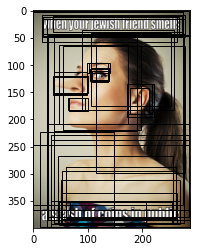

In [13]:
img_id = 19536
top3_coords = ol.get_top3_coords(img_id)
ol.show_img_bboxes(img_id, top3_coords)

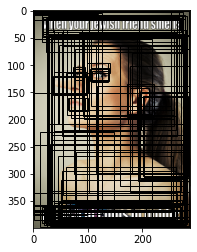

In [14]:
img_id = 19536
top3_coords = ol.get_all_coords(img_id)
ol.show_img_bboxes(img_id, top3_coords) 

D:\Blazej\Dokumenty\AI MSc\Period 4\Natural Language Processing 2\Projects\Multimodal-NLP\prediction_analysis\objects_loader.py:64: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top3 = self.objects_df[self.objects_df["image_id"]==img_id][self.objects_df["object_conf"]>conf_thresh]


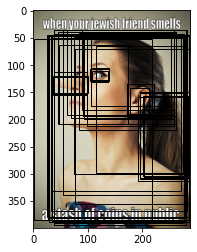

In [15]:
img_id = 19536
top3_coords = ol.get_most_conf_coords(img_id)
ol.show_img_bboxes(img_id, top3_coords)

## Get object labels of an image

In [16]:
img_id = 93541
ol.get_img_object_names(img_id)

['ground',
 'man',
 'wall',
 'wall',
 'man',
 'man',
 'log',
 'jacket',
 'number',
 'hat',
 'man',
 'man',
 'jeans',
 'wall',
 'person',
 'man',
 'man',
 'ground',
 'shoe',
 'man',
 'stick',
 'man',
 'ground',
 'banner',
 'sign',
 'hat',
 'head',
 'letters',
 'shirt',
 'people',
 'people',
 'man',
 'man',
 'writing',
 'man',
 'ground',
 'man',
 'legs',
 'man',
 'wall',
 'man',
 'man',
 'letters',
 'log',
 'stick',
 'jacket',
 'log',
 'letters',
 'hat',
 'letters',
 'man',
 'banner',
 'ground',
 'people',
 'scene',
 'ground',
 'banner',
 'log',
 'paper',
 'log',
 'number',
 'man',
 'people',
 'shadow',
 'people',
 'man',
 'banner',
 'man',
 'jacket',
 'ground',
 'banner',
 'wall',
 'man',
 'wire',
 'ground',
 'man',
 'man',
 'stick',
 'people',
 'ground',
 'man',
 'man',
 'banner',
 'man',
 'man',
 'man',
 'ground',
 'ground',
 'ground',
 'ground',
 'man',
 'wall',
 'log',
 'wall',
 'ground',
 'hand',
 'man',
 'banner',
 'banner',
 'sign']